In [6]:
# библиотеки
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
# подключение гугл-диска
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Входной датасет
input_dataset_file = '/content/drive/My Drive/Bases/SEV_KAV/dataset_1.csv'

# датасет с кластеризацией
output_dataset_file = '/content/drive/My Drive/Bases/SEV_KAV/dataset_klust.csv'

In [ ]:
# загружаем обучающий датасет...
df = pd.read_csv(input_dataset_file, sep=',')

In [ ]:
df

,inn,lifetime,region,okved,avr_salary,oborot,bad_behav,gov_sup,okved_cat,gov_sup_class
0,772400402907,490,77,73.11,82.185,6.038797,False,False,2003,1
1,772397052865,125,77,25.50.1,82.185,6.038797,False,False,705,1
2,772395508292,2294,77,43.32,82.185,6.038797,False,False,1119,1
3,772397435000,186,77,47.91,82.185,6.038797,False,False,1575,1
4,772400328851,125,77,47.91,82.185,6.038797,False,False,1575,1
...,...,...,...,...,...,...,...,...,...,...
3542257,343802729679,520,34,49.41,30.143,0.478130,False,True,1616,1
3542258,343900084404,2294,34,47.71,30.143,0.478130,False,True,1516,1
3542259,343802716503,2294,34,43.21,30.143,0.478130,False,True,1114,1
3542260,343804909268,216,34,42.21,30.143,0.478130,False,False,1090,1


In [ ]:
# массив для кластеризации (вибираем нужные поля)
data_for_clust = df[['lifetime', 'region', 'avr_salary', 
                     'oborot', 'okved_cat', 'gov_sup_class']].to_numpy()
print(data_for_clust.shape)

(3542262, 6)


***K-средние***

In [ ]:
# количество кластеров
clustersCount = 5

kmean = KMeans(clustersCount)
kmean.fit(data_for_clust)
labels = kmean.labels_

In [ ]:
# добавляем результаты кластеризации в таблицу
df['k_means_clust'] = labels

In [ ]:
# распределение классов
df['k_means_clust'].value_counts()

1    1135342
2    1124602
4     665544
0     340046
3     276728
Name: k_means_clust, dtype: int64

In [ ]:
# сохранение результирующей таблички после кластеризации
df.to_csv(output_dataset_file, index=False)

**ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ**

In [4]:
df = pd.read_csv(output_dataset_file, sep=',')

In [5]:
df

,inn,lifetime,region,okved,avr_salary,oborot,bad_behav,gov_sup,okved_cat,gov_sup_class,k_means_clust
0,772400402907,490,77,73.11,82.185,6.038797,False,False,2003,1,2
1,772397052865,125,77,25.50.1,82.185,6.038797,False,False,705,1,0
2,772395508292,2294,77,43.32,82.185,6.038797,False,False,1119,1,3
3,772397435000,186,77,47.91,82.185,6.038797,False,False,1575,1,2
4,772400328851,125,77,47.91,82.185,6.038797,False,False,1575,1,2
...,...,...,...,...,...,...,...,...,...,...,...
3542257,343802729679,520,34,49.41,30.143,0.478130,False,True,1616,1,2
3542258,343900084404,2294,34,47.71,30.143,0.478130,False,True,1516,1,1
3542259,343802716503,2294,34,43.21,30.143,0.478130,False,True,1114,1,3
3542260,343804909268,216,34,42.21,30.143,0.478130,False,False,1090,1,0


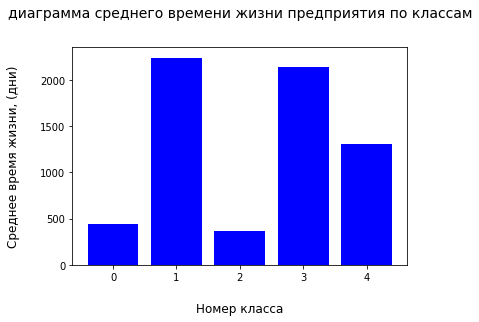

In [ ]:
# диаграмма среднего времени жизни предприятия по классам
y = []
for i in range(5):
  y.append(int(df[(df['k_means_clust'] == i)]['lifetime'].mean()))

plt.bar([i for i in range(5)], y, color='b')

plt.title('диаграмма среднего времени жизни предприятия по классам', pad=30, fontsize=14)

plt.ylabel('Среднее время жизни, (дни)', labelpad=20, fontsize=12)
plt.xlabel('Номер класса', labelpad=20, fontsize=12)
plt.show()


In [ ]:
region_num_dict = {}
excel_data = pd.read_excel('/content/drive/My Drive/Bases/SEV_KAV/reg.xlsx', 
                           index_col=None, header=None)
for name in excel_data.iterrows():
	region_num_dict[name[1].tolist()[1].replace('\xa0', ' ')] = name[1].tolist()[0]

def region_by_code(code):
  res = ''
  for key in region_num_dict:
    if region_num_dict[key] == code:
      res = key
  return res

In [ ]:
print(region_by_code(77))

г. Москва


In [ ]:
print('ПРЕДСТАВЛЕНИЕ КЛАСТЕРОВ РЕГИОНАМИ:')

# для каждого класса...
for i in range(5):

  all_count = len(df[(df['k_means_clust'] == i)])
  rab = df[(df['k_means_clust'] == i)]['region'].value_counts()
  reg = list(rab.keys())[:5]
  counts = list(rab.values)[:5]
  print('\n=============== Кластер', i, '==============:')
  for j in range(5):
    s = region_by_code(reg[j]) + '  -  ' + str(round(counts[j]/all_count*100)) + ' %' 
    print(' {: >35}'.format(s))

ПРЕДСТАВЛЕНИЕ КЛАСТЕРОВ РЕГИОНАМИ:

=============== Кластер 0 ==============:
                   г. Москва  -  7 %
          Московская область  -  7 %
          Краснодарский край  -  5 %
             Санкт-Петербург  -  5 %
        Свердловская область  -  3 %

=============== Кластер 1 ==============:
                   г. Москва  -  9 %
          Краснодарский край  -  6 %
          Московская область  -  6 %
             Санкт-Петербург  -  4 %
          Ростовская область  -  4 %

=============== Кластер 2 ==============:
                  г. Москва  -  13 %
          Московская область  -  9 %
             Санкт-Петербург  -  6 %
          Краснодарский край  -  5 %
          Ростовская область  -  3 %

=============== Кластер 3 ==============:
                   г. Москва  -  7 %
          Краснодарский край  -  6 %
          Московская область  -  6 %
          Ростовская область  -  4 %
             Санкт-Петербург  -  4 %

=============== Кластер 4 ==============:
          

In [ ]:
print('ПРЕДСТАВЛЕНИЕ КЛАСТЕРОВ ОКВЭД:')

# для каждого класса...
for i in range(5):

  all_count = len(df[(df['k_means_clust'] == i)])
  rab = df[(df['k_means_clust'] == i)]['okved'].value_counts()
  okved = list(rab.keys())[:5]
  counts = list(rab.values)[:5]
  print('\n=============== Кластер', i, '==============:')
  for j in range(5):
    s = okved[j] + '  -  ' + str(round(counts[j]/all_count*100)) + ' %' 
    print(' {: >20}'.format(s))

ПРЕДСТАВЛЕНИЕ КЛАСТЕРОВ ОКВЭД:

=============== Кластер 0 ==============:
       41.20  -  12 %
        45.20  -  6 %
        43.21  -  6 %
        43.29  -  4 %
        45.32  -  3 %

=============== Кластер 1 ==============:
         49.4  -  6 %
        47.11  -  4 %
        47.71  -  4 %
        68.20  -  3 %
        47.19  -  3 %

=============== Кластер 2 ==============:
       47.91  -  14 %
        49.41  -  7 %
        47.11  -  4 %
        68.20  -  3 %
        49.32  -  3 %

=============== Кластер 3 ==============:
        45.32  -  7 %
        45.20  -  7 %
        41.20  -  5 %
        43.21  -  4 %
      45.20.1  -  3 %

=============== Кластер 4 ==============:
        49.41  -  9 %
        68.20  -  4 %
        47.11  -  4 %
        49.32  -  4 %
        96.02  -  3 %


In [ ]:
list(df[(df['k_means_clust'] == 0)]['region'])

In [19]:
# универсальная функция визуализации облаков - кластеров

# data - датасет
# x_col - название столбца для X координаты
# y_col - название столбца для Y координаты
# clasters_count - количество кластеров
# scale - какая часть данных визуализируется (с большими массивами проблема)
def clusters_show_2d(data, x_col, y_col, clusters_count=5, scale=0.01):

  markers = ['ro', 'go', 'bo', 'yo', 'co', 'mo', 'ko']  

  plt.figure(figsize=(10,10))

  for i in range(clusters_count):    

    x = np.array(df[(df['k_means_clust'] == i)][x_col])
    y = np.array(df[(df['k_means_clust'] == i)][y_col])

    _, x, _, y = train_test_split(x, y, test_size=scale, random_state=1) 

    for j in range(len(x)): 
      plt.plot(x[j], y[j], markers[i])

  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.show()

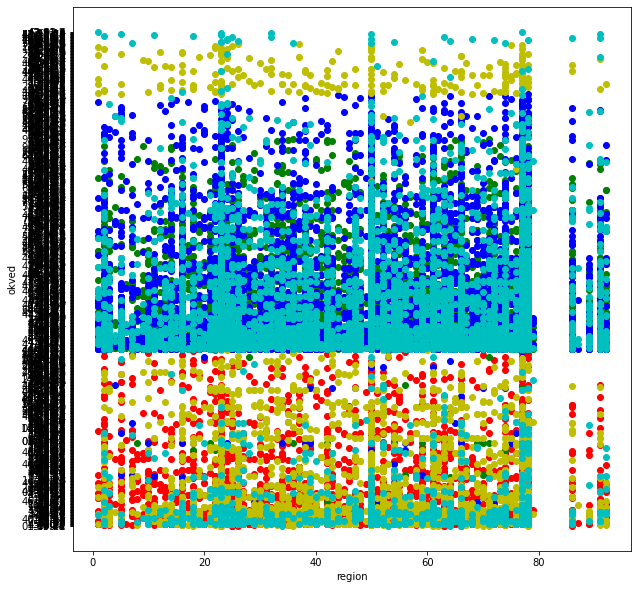

In [20]:
clusters_show_2d(df, 'region', 'okved')

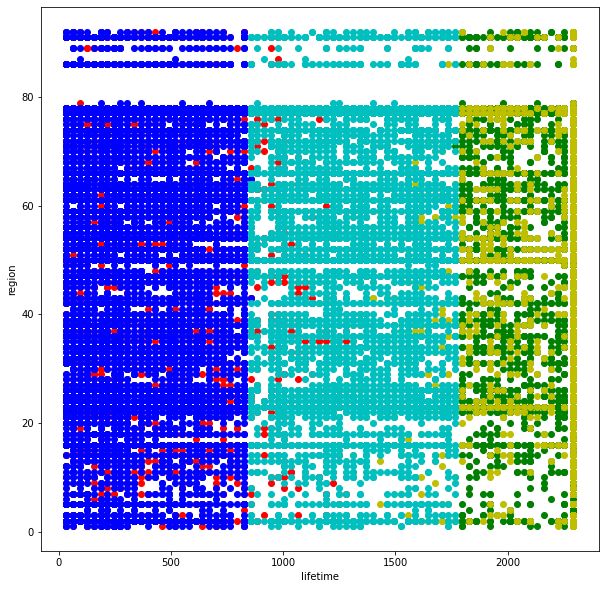

In [21]:
clusters_show_2d(df, 'lifetime', 'region')

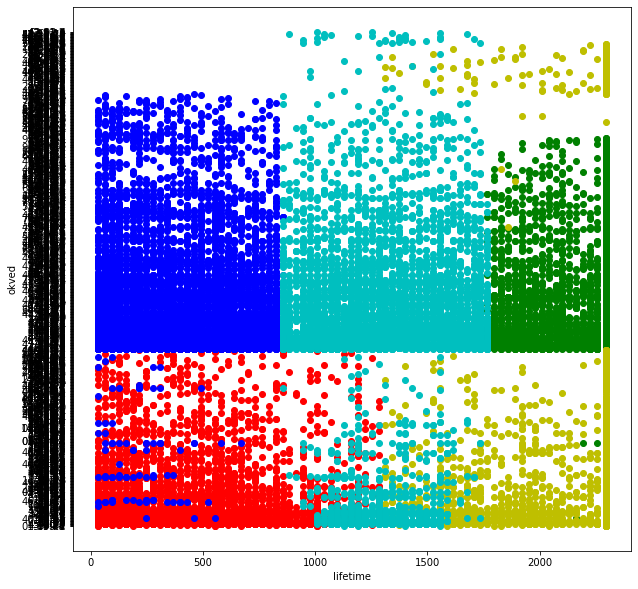

In [22]:
clusters_show_2d(df, 'lifetime', 'okved')